In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### Building network

In [6]:
classifier = Sequential()
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))

In [12]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### data Augmentation

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("dataset/training_set",
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = "binary")

test_set = test_datagen.flow_from_directory("dataset/test_set",
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### training

In [13]:
history = classifier.fit_generator(training_set,
                                  steps_per_epoch = 50,
                                  epochs = 10,
                                  validation_data=test_set,
                                  verbose=1)

Epoch 1/10
50/50 [==============================] - 75s 1s/step - loss: 0.7188 - accuracy: 0.5125 - val_loss: 0.6884 - val_accuracy: 0.5010
Epoch 2/10
50/50 [==============================] - 69s 1s/step - loss: 0.6828 - accuracy: 0.5590 - val_loss: 0.6819 - val_accuracy: 0.5215
Epoch 3/10
50/50 [==============================] - 65s 1s/step - loss: 0.6595 - accuracy: 0.5999 - val_loss: 0.6526 - val_accuracy: 0.6585
Epoch 4/10
50/50 [==============================] - 67s 1s/step - loss: 0.6624 - accuracy: 0.5897 - val_loss: 0.6423 - val_accuracy: 0.6420
Epoch 5/10
50/50 [==============================] - 67s 1s/step - loss: 0.6499 - accuracy: 0.6416 - val_loss: 0.6131 - val_accuracy: 0.6740
Epoch 6/10
50/50 [==============================] - 65s 1s/step - loss: 0.6158 - accuracy: 0.6570 - val_loss: 0.6621 - val_accuracy: 0.5860
Epoch 7/10
50/50 [==============================] - 65s 1s/step - loss: 0.6094 - accuracy: 0.6819 - val_loss: 0.6115 - val_accuracy: 0.6645
Epoch 8/10
50/50 [==

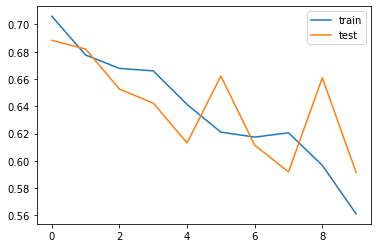

In [14]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("random_dog.png", target_size=(64,64))

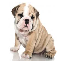

In [24]:
test_image

In [25]:
test_image = image.img_to_array(test_image)

In [26]:
test_image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [27]:
test_image.shape

(64, 64, 3)

In [28]:
test_image = np.expand_dims(test_image, axis=0)

In [29]:
test_image.shape

(1, 64, 64, 3)

In [31]:
result = classifier.predict(test_image)

In [33]:
result

array([[1.]], dtype=float32)

In [32]:
# print(training_set.class_indices)

if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
